In [25]:
#step 1: Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
import seaborn as sns


In [2]:
#Step 2: Load your dataset ---
df = pd.read_csv('Mall_Customers.csv')

In [4]:
# Get the number of missing values in each column
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [3]:
# Check if any null values exist in the dataset
print(df.isnull().values.any())

False


In [5]:
# Print data types of all columns
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [6]:
# Perform one-hot encoding on the 'Gender' column
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [7]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [8]:
# Drop CustomerID (not a feature)
df_features = df.drop(columns=['CustomerID'])

In [10]:
# One-hot encode the 'Gender' column
df_features = pd.get_dummies(df_features, columns=['Gender'], drop_first=True)


In [11]:
# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)

In [12]:
#Convert back to DataFrame for easier viewing
scaled_df = pd.DataFrame(scaled_data, columns=df_features.columns)


In [13]:
print(scaled_df.head())

        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0 -1.424569           -1.738999               -0.434801     1.128152
1 -1.281035           -1.738999                1.195704     1.128152
2 -1.352802           -1.700830               -1.715913    -0.886405
3 -1.137502           -1.700830                1.040418    -0.886405
4 -0.563369           -1.662660               -0.395980    -0.886405


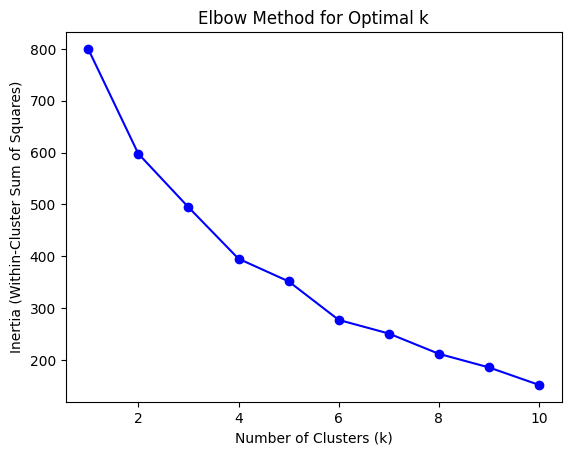

In [15]:
# Elbow Method to determine optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
# Plot Elbow Curve
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [18]:
# Range of cluster counts to test
K = range(2, 11)
silhouette_scores = []
# Loop through different cluster counts
for k in K:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)

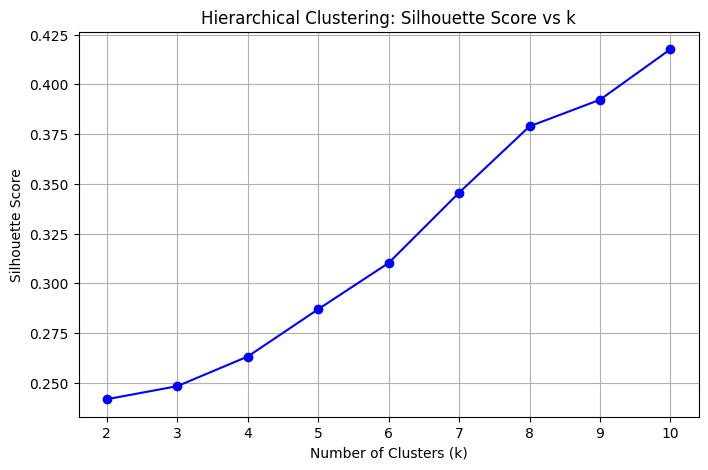

In [19]:
# Plot Silhouette Score vs Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Hierarchical Clustering: Silhouette Score vs k')
plt.grid(True)
plt.show()

In [27]:
# Define the number of clusters you want to test
n_clusters = 6  # or 7, or 10 based on your earlier analysis
# Apply Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hc_labels = model.fit_predict(scaled_df)
# Compute Silhouette Score
sil_score = silhouette_score(scaled_df, hc_labels)

In [22]:
#PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

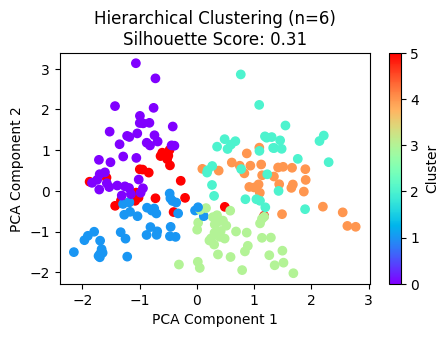

In [31]:
#Plot Clusters in 2D
plt.figure(figsize=(5, 3))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hc_labels, cmap='rainbow')
plt.title(f"Hierarchical Clustering (n={n_clusters})\nSilhouette Score: {sil_score:.2f}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')
plt.show()

In [29]:
# Define range of cluster counts to evaluate
cluster_range = range(2, 11)
silhouette_scores = []

# Evaluate silhouette score for each cluster count
for k in cluster_range:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)
    print(f"Clusters: {k}, Silhouette Score: {score:.4f}")

# Find best number of clusters
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)

print(f"\n✅ Best Number of Clusters: {best_k} with Silhouette Score: {best_score:.4f}")

Clusters: 2, Silhouette Score: 0.2418
Clusters: 3, Silhouette Score: 0.2483
Clusters: 4, Silhouette Score: 0.2632
Clusters: 5, Silhouette Score: 0.2870
Clusters: 6, Silhouette Score: 0.3102
Clusters: 7, Silhouette Score: 0.3456
Clusters: 8, Silhouette Score: 0.3789
Clusters: 9, Silhouette Score: 0.3923
Clusters: 10, Silhouette Score: 0.4176

✅ Best Number of Clusters: 10 with Silhouette Score: 0.4176


**Interpretation**


*   We applied Agglomerative Clustering using Ward's method for cluster counts ranging from 2 to 10. The model performance was evaluated using the Silhouette Score, which quantifies the cohesion and separation of the clusters. The highest Silhouette Score of 0.42 was achieved when k = 10, indicating the best cluster structure in terms of compactness and separation. However, trade-offs between interpretability and performance may justify selecting a slightly lower k such as 6 or 7.
